# 1. Prepare dataset.

In [6]:
# Import all the necessary packages.
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Import the data set.
df = pd.read_csv('breast_cancer_data.csv',
                index_col='id')

# View the DataFrame.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 2. Explore the data

In [7]:
# Determine if there are any null values.
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [8]:
# Determine the descriptive statistics.
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# 3. Manipulate the data

In [9]:
# All values are null. We'll drop them.
df.drop(labels='Unnamed: 32', axis=1, inplace=True)

# View DataFrame.
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Determine if the data in Diagnosis is balanced.
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Diagnosis Imbalance')

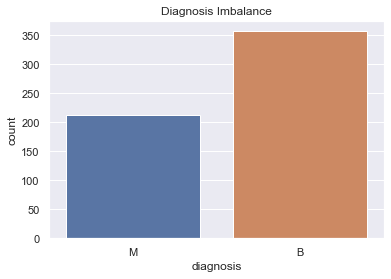

In [11]:
# Create a plot with Seaborn.
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='diagnosis', data=df)
ax.set_title('Diagnosis Imbalance')

# 4. Prepare the data

In [15]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

# Set the variables:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

# Normalise the data with the min-max feature scale.
X = (X -np.min(X))/(np.max(X)-np.min(X)).values

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['diagnosis'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.319892      0.277308        0.306337   0.187275         0.242033   
1     0.302381      0.225905        0.292378   0.173913         0.167193   
2     0.364854      0.144403        0.376132   0.217434         0.455629   
3     0.280610      0.223876        0.267708   0.158176         0.241762   
4     0.314213      0.457220        0.299910   0.182269         0.359574   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.136127        0.067502             0.066054       0.208586   
1          0.165235        0.189597             0.139165       0.182828   
2          0.503711        0.339738             0.313121       0.518182   
3          0.105147        0.090745             0.118141       0.388384   
4          0.147506        0.069681             0.121421       0.305051   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

,diagnosis
0,B
1,B
2,B
3,B
4,B


In [17]:
# Determine whether the data is balanced
os_data_y['diagnosis'].value_counts()

B    249
M    249
Name: diagnosis, dtype: int64

# 5. Eliminate multicollinearity 

Determine the Variance Inflation Factor (VIF) and drop columns with a high VIF.

In [18]:
# Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
  
# Calculate VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# View the output.
vif_data

,feature,VIF
0,radius_mean,18389.746572
1,texture_mean,70.903888
2,perimeter_mean,18652.893144
3,area_mean,881.202104
4,smoothness_mean,86.198326
5,compactness_mean,167.396879
6,concavity_mean,158.307789
7,concave points_mean,147.984046
8,symmetry_mean,35.273121
9,fractal_dimension_mean,53.265699


Drop the columns with a high VIF. (Hint: Normally we’ll drop columns with a VIF>10. However, for this data set, we’ll drop all the columns with a VIF>30.)

In [19]:
# Droping the columns with VIF > 30 to avoid multicollinearity problems.
df = df.drop(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
             'smoothness_mean', 'compactness_mean', 'concavity_mean',
             'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
             'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 
             'concavity_se', 'concave points_se', 'radius_worst',
             'texture_worst', 'perimeter_worst', 'area_worst',
             'smoothness_worst', 'compactness_worst', 'concavity_worst',
             'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
             axis = 1)

# View the DataFrame.
print(df.shape)
df.head()

(569, 5)


,diagnosis,texture_se,smoothness_se,symmetry_se,fractal_dimension_se
id,,,,,
842302,M,0.9053,0.006399,0.03003,0.006193
842517,M,0.7339,0.005225,0.01389,0.003532
84300903,M,0.7869,0.006150,0.02250,0.004571
84348301,M,1.1560,0.009110,0.05963,0.009208
84358402,M,0.7813,0.011490,0.01756,0.005115


# 6. Create the BLR model

In [20]:
# Import necessary packages.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train) 

LogisticRegression()

# 7. Calculate accuracy of the model

In [36]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


<AxesSubplot:>

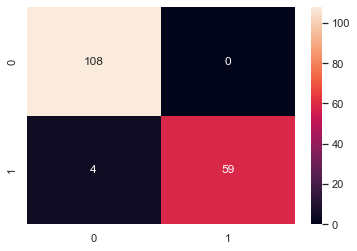

In [22]:
# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [32]:
# Create a DataFrame to display the confusion matrix. 
pd.DataFrame(confusion_matrix, index=['actual_healthy','actual_cancer'],
columns=['predicted_healthy', 'predicted_cancer'])

,predicted_healthy,predicted_cancer
actual_healthy,108,0
actual_cancer,4,59


    -TN indicates that 108 patients are healthy.
    -FP indicates that 0 patients who are predicted as cancer, but were incorrectly actually healthy.
    -FN indicates that 4 patients were predicted as healthy, but they have cancer.
    -TP indicates that 59 patients has cancer.

In [33]:
# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           B       0.96      1.00      0.98       108
           M       1.00      0.94      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



The high precision scores indicate that the model is accurate.

# Conclusion

Since the objective is to identify whether a patient is likely to have breast cancer, we would want to classify patients as ‘Is cancer’ (diagnosis=M=1) or ‘is healthy’ (diagnosis=B=0). We fitted a BLR model trying to predict one of two categories: 1 or 0. After working through the demonstration, we produced a model that had an accuracy score of 98%, which measures the number of correct predictions.

This is a fairly high accuracy score; and given that we can successfully classify patients that have cancer at an expected probability of 98%, we can hopefully intervene and prevent this from taking place. Given that we could get this wrong 2% of the time, the cost of this misclassification is likely slim compared to the benefits of identifying the cases that require intervention.

If the business case and risk of misclassification are extremely high (like in healthcare matters where the cost of misclassifying a disease is extremely high), an accuracy rate of 98% might not be acceptable, and you would want to attempt to tune the model to improve this score.